Total suspended load for za=0.0000: 98 kg/m2
Total suspended load for za=0.0053: 133 kg/m2
Total suspended load for za=0.1000: 153 kg/m2
Total suspended load for za=0.5000: 166 kg/m2


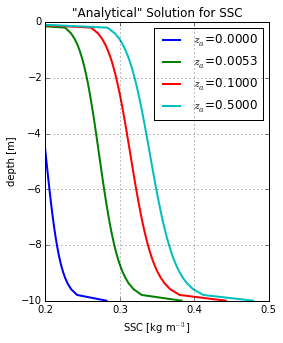

In [4]:
# Calculate and plot the Rouse profile
# Not sure who wrote this...Tarandeep sent it to me
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

E0 = 5e-5 # kg/m2/s
phi = 0.90
# unitless
tau_c = 0.05 # N/m2
ws = 1.0e-3 # m/s
za = np.array([1e-5, 5.3e-3, 0.1, 0.5])[None,:] # m, make 2D
# From text; solution to shear stress
kappa = 0.41
ustar = 0.0625 #m/s
alpha = 0.8 # Prandtl number

rho = 1024
# kg/m3
tau_b = rho*ustar**2
E = E0*(1-phi)*(tau_b/tau_c - 1)
C0 = E/ws
#print('tau_b={:f} E={:f} C0={:f}'.format(tau_b,E,C0))
P=ws/alpha/kappa/ustar

H=10 

f=plt.figure(figsize=(4,5))

z=np.linspace(0.01,H)[:,None] #Make 2D

def rouse(z,P,H,z0,C0):
    C = C0*( z*(H-z0) / (z0*(H-z)+0.000000001))**(-P)
    return C

C = rouse(z,P,H,za,C0)

for i,zat in enumerate(za[0,:]):
    plt.plot(C[:,i],z-H, lw=2, label='$z_a$={:.4f}'.format(zat))
    print('Total suspended load for za={:.4f}: {:.0f} kg/m2'.format(zat,np.sum(C[1:,i])*H))

plt.legend()
plt.xlabel('SSC [kg m$^{-3}$]')
plt.ylabel('depth [m]')
plt.title('"Analytical" Solution for SSC')
plt.xlim([0.2,0.5])
plt.xticks(np.arange(0.2,0.51,0.1))
plt.grid('on')
#print("Total suspended load: z_a={})


